In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

In [2]:
df = pd.read_csv("../data/SQuAD-PL/train.csv")

In [3]:
df

,qa_id,group_id,passage_id,context,question,answer_text,answer_start
0,0,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyonce zaczęła być popularna?,pod koniec lat 90.,264
1,2,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyonce opuściła Destiny's Child i zosta...,2003,550
2,4,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,W której dekadzie Beyonce stała się sławna?,koniec lat 90.,268
3,8,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyoncé zyskała sławę?,koniec lat 90.,268
4,11,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyoncé wydała Dangerously In Love?,2003,550
...,...,...,...,...,...,...,...
78260,130314,441,28,Termin „materia” jest używany w fizyce w oszał...,Fizyka szeroko zgodziła się na definicję czego?,NaN,0
78261,130315,441,28,Termin „materia” jest używany w fizyce w oszał...,Kto ukuł termin materia partonic?,NaN,0
78262,130316,441,28,Termin „materia” jest używany w fizyce w oszał...,Jaka jest inna nazwa antymaterii?,NaN,0
78263,130317,441,28,Termin „materia” jest używany w fizyce w oszał...,Materii zwykle nie trzeba używać w połączeniu ...,NaN,0


In [4]:
questions = df["question"].unique().tolist()

In [5]:
words = Counter([y for x in questions for y in x.split(" ")])

In [6]:
words.most_common(100)

[('w', 23100),
 ('się', 12622),
 ('jest', 10296),
 ('Co', 8427),
 ('na', 8106),
 ('W', 7936),
 ('z', 7195),
 ('Jaki', 6923),
 ('Kto', 6593),
 ('do', 5984),
 ('Kiedy', 5977),
 ('nie', 5653),
 ('i', 5141),
 ('roku', 5077),
 ('Jakie', 4802),
 ('Jaka', 4795),
 ('którym', 4773),
 ('Ile', 4633),
 ('roku?', 4547),
 ('Jak', 4183),
 ('był', 3341),
 ('są', 2736),
 ('że', 2471),
 ('jakim', 2189),
 ('Gdzie', 2137),
 ('po', 2053),
 ('przez', 1834),
 ('ma', 1815),
 ('o', 1806),
 ('była', 1802),
 ('za', 1789),
 ('jako', 1591),
 ('od', 1578),
 ('Który', 1544),
 ('co', 1496),
 ('dla', 1495),
 ('został', 1464),
 ('Z', 1314),
 ('było', 1269),
 ('procent', 1202),
 ('Ilu', 1179),
 ('Na', 1165),
 ('aby', 1123),
 ('Do', 1053),
 ('pierwszy', 1045),
 ('znajduje', 1031),
 ('nazywa', 1011),
 ('Dlaczego', 990),
 ('jakiej', 974),
 ('jakiego', 958),
 ('czego', 938),
 ('Jaką', 932),
 ('można', 893),
 ('zostało', 874),
 ('który', 872),
 ('może', 867),
 ('jaki', 863),
 ('Czego', 855),
 ('które', 834),
 ('to', 826),
 (

In [7]:
first_word = Counter([x.split(" ")[0] for x in questions])

In [8]:
first_word.most_common(100)

[('Co', 8408),
 ('W', 7933),
 ('Jaki', 6919),
 ('Kto', 6593),
 ('Kiedy', 5977),
 ('Jakie', 4799),
 ('Jaka', 4795),
 ('Ile', 4631),
 ('Jak', 4182),
 ('Gdzie', 2136),
 ('Który', 1544),
 ('Z', 1307),
 ('Ilu', 1179),
 ('Na', 1164),
 ('Do', 1053),
 ('Dlaczego', 990),
 ('Jaką', 932),
 ('Czego', 855),
 ('Która', 806),
 ('Czym', 791),
 ('Kim', 646),
 ('Które', 634),
 ('Jakiego', 632),
 ('Czy', 514),
 ('Od', 408),
 ('Kogo', 367),
 ('O', 359),
 ('Skąd', 306),
 ('Jakim', 288),
 ('Jakiej', 259),
 ('Za', 239),
 ('Komu', 195),
 ('Jakich', 182),
 ('Po', 168),
 ('Którzy', 146),
 ('Przez', 143),
 ('Poza', 121),
 ('Jacy', 114),
 ('Dokąd', 113),
 ('Według', 110),
 ('Czyje', 99),
 ('Pod', 97),
 ('Dla', 94),
 ('Jeśli', 94),
 ('Wymień', 71),
 ('Którą', 69),
 ('Czemu', 68),
 ('Oprócz', 67),
 ('Jakimi', 61),
 ('Czyja', 60),
 ('co', 56),
 ('Czyj', 55),
 ('Przed', 54),
 ('Wraz', 51),
 ('Którego', 42),
 ('Podczas', 41),
 ('w', 38),
 ('Jakiemu', 35),
 ('Któż', 32),
 ('Co,', 32),
 ('Nad', 28),
 ('kto', 27),
 ('Uwa

In [9]:
first_two_words = Counter([" ".join(x.split(" ")[:2]) for x in questions])

In [10]:
first_two_words.most_common(100)

[('W którym', 4402),
 ('Jaka jest', 1623),
 ('Jaki jest', 1594),
 ('W jakim', 1558),
 ('Jaki procent', 987),
 ('Jak nazywa', 890),
 ('Kto był', 885),
 ('Jaka była', 879),
 ('Jaki był', 800),
 ('Jakie są', 717),
 ('Jaki rodzaj', 562),
 ('Co jest', 523),
 ('Jak długo', 472),
 ('Do czego', 456),
 ('Jakie jest', 450),
 ('W jakiej', 398),
 ('Ile osób', 379),
 ('W jaki', 334),
 ('W jakich', 325),
 ('Co nie', 298),
 ('Jak nazywał', 293),
 ('Co się', 293),
 ('Kto jest', 289),
 ('Czym jest', 287),
 ('Co oznacza', 280),
 ('Z jakiego', 277),
 ('Na co', 258),
 ('Z czego', 255),
 ('Czego nie', 243),
 ('Kto został', 239),
 ('Co to', 234),
 ('Kto nie', 230),
 ('Co zostało', 226),
 ('Jaka część', 225),
 ('Gdzie znajduje', 218),
 ('Gdzie jest', 215),
 ('Ile lat', 213),
 ('Jaka grupa', 212),
 ('Kim był', 210),
 ('Kto napisał', 198),
 ('Jakiego rodzaju', 194),
 ('Do jakiego', 193),
 ('Kim jest', 190),
 ('Na jakim', 177),
 ('Co było', 175),
 ('Z kim', 174),
 ('Który kraj', 172),
 ('Jakie było', 170),
 ('N

In [11]:
total = sum(first_word.values())
for x in first_word.most_common(10):
    print(x[0], x[1] / total)

Co 0.10767063644512742
W 0.10158791138430016
Jaki 0.08860289409655525
Kto 0.08442822384428224
Kiedy 0.07653988987066206
Jakie 0.061454731719810474
Jaka 0.06140350877192982
Ile 0.05930336790882315
Jak 0.05355359200922013
Gdzie 0.027353054168267384


In [12]:
pd.DataFrame([x[0] for x in first_word.most_common(100)], columns=["word"]).to_csv("question_first_word.csv", index=False)
pd.DataFrame([x[0] for x in first_two_words.most_common(100)], columns=["word"]).to_csv("question_first_two_words.csv", index=False)

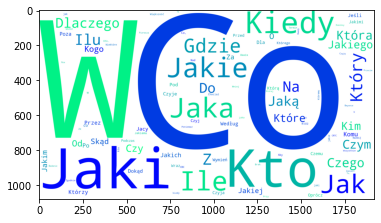

In [13]:
wordcloud = WordCloud(width=1920, height=1080, background_color="white", relative_scaling="auto", colormap="winter", max_words=100).generate_from_frequencies(first_word)
wordcloud.to_file("question_first_word.png")
plt.imshow(wordcloud)
plt.show()

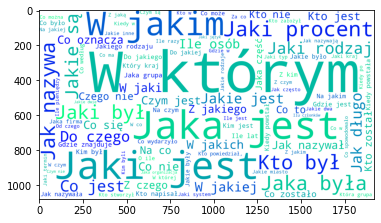

In [14]:
wordcloud = WordCloud(width=1920, height=1080, background_color="white", relative_scaling="auto", colormap="winter", max_words=100).generate_from_frequencies(first_two_words)
wordcloud.to_file("question_first_two_words.png")
plt.imshow(wordcloud)
plt.show()